# Convert to LevSeq format


LevSeq columns:
- id (experiment_name)  
- barcode_plate (barcode_id)  
- plate (user named plate name)  
- well   
- alignment_count	 
- nucleotide_mutation	
- amino_acid_substitutions	
- alignment_probability	
- average_mutation_frequency	
- p_value	
- p_adj_value	
- nt_sequence	
- aa_sequence
- compound_smiles (smiles of the compound could be substrate or product or intermediate)
- fitness_value (fitness value for that compound for this plate)

Metadata columns:
- cif file  
- experiment_id
- experiment_name
- experiment_date
- substrate_smiles
- product_smiles
- assay_technique


Feedback on briefly looking at the curated data folder:
do you plan to add cif in there later? I only see two files in there
I see you have merged all the experiments into one big csv file. I suggest breaking each experiment (like a real world scenario) into its own csv file so like:
|--meta_file.csv
|--E-1.csv
|--E-1.cif
|--E-10.csv
|--E-10.cif
|-- etc
This will allow you to scale the data sample data. You just need to add a row to meta data when you add a file later.
3. in the data file: there are many missing columns... amino_acid_substitutions, plate for example? am i missing something? make sure the headings of each experiment data file matches the files we had (don't need X and Y)
4. in the data file: well is always 1 ! is that a typo?
5. in the meta file: I don't see a mutegenasis method. add a column accordingly. you can mark the SSM ones, blank can mean default eppcr
6. in the meta file: you have see the "literature" as the assay method
I don't see literature in the assay list you guys had provided early on
do you want to provide a bit more variety to this column for the paper?

In [274]:
# Get the heme we want as well
chai_structures

,Unnamed: 0,id,barcode_plate,plate,well,smiles_string,smiles_reaction,alignment_count,alignment_probability,nucleotide_mutation,...,generation,parent_enzyme_id,additional_information,paper,conversion,activity,idx,intermediate,substrate,protein_to_smiles
0,0.0,chai75,1.0,Plate_1,A01,CN1C[C@](C)(Cc2ccccc2)CC1=O,ClCC(=O)N(C\C(=C\C1=CC=CC=C1)\C)C>>C(C1=CC=CC=...,1.0,1.0,NaN,...,0.0,NaN,"{""x_axis_label"":""NCR"",""conversion"":""nan"",""cata...",Synthesis of i β i -Quaternary Lactams Using P...,NaN,NaN,CN1C[C@](C)(Cc2ccccc2)CC1=O_MPSLFDPIRFGAFTAKNR...,NaN,ClCC(=O)N(C\C(=C\C1=CC=CC=C1)\C)C,MPSLFDPIRFGAFTAKNRIWMAPLTRGRATRDHVPTEIMAEYYAQR...
1,0.0,chai76,1.0,Plate_1,A01,CCOC(=O)/C(C#N)=C/C=C/c1ccc(N(C)C)cc1,CN(C1=CC=C(C=O)C=C1)C.C(#N)CC(=O)OCC>>C(#N)/C(...,1.0,1.0,NaN,...,0.0,NaN,"{""x_axis_label"":""RA95.5-8"",""conversion"":""nan"",...",Fast Knoevenagel Condensations Catalyzed by an...,NaN,NaN,CCOC(=O)/C(C#N)=C/C=C/c1ccc(N(C)C)cc1_MPRYLKGW...,C(#N)CC(=O)OCC,CN(C1=CC=C(C=O)C=C1)C,MPRYLKGWLEDVVQLSLRRPSVHASRQRPIISLNERILEFNKRNIT...
2,0.0,chai77,1.0,Plate_1,A01,N[C@@H](Cc1c[nH]c2cccc([N+](=O)[O-])c12)C(=O)O,[N+](=O)([O-])C1=C2C=CNC2=CC=C1.N[C@H](C(=O)O)...,1.0,1.0,NaN,...,0.0,NaN,"{""x_axis_label"":""Pf2B9"",""catalyst_form"":""heat-...",Unlocking Reactivity of TrpB A General Biocata...,NaN,NaN,N[C@@H](Cc1c[nH]c2cccc([N+](=O)[O-])c12)C(=O)O...,N[C@H](C(=O)O)CO,[N+](=O)([O-])C1=C2C=CNC2=CC=C1,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...
3,0.0,chai78,1.0,Plate_1,A01,CC(=O)OCCc1ccccc1.COC(=O)CCc1ccccc1,C1(=CC=CC=C1)CCC(C)=O>>C(C)(=O)OCCC1=CC=CC=C1....,1.0,1.0,NaN,...,0.0,NaN,"{""x_axis_label"":""WT"",""conversion"":""100.0"",""cat...",Overriding Traditional Electronic Effects in B...,NaN,NaN,CC(=O)OCCc1ccccc1.COC(=O)CCc1ccccc1_MSTTQTPDLD...,NaN,C1(=CC=CC=C1)CCC(C)=O,MSTTQTPDLDAIVIGAGFGGIYMLHKLRNDLGLSVRVFEKGGGVGG...
4,0.0,chai79,1.0,Plate_1,A01,COc1ccc(C(O)CN)cc1,CC(C)(C)C(=O)ON.O[S](=O)(=O)C(F)(F)F.COc1ccc(C...,1.0,1.0,NaN,...,0.0,NaN,"{""x_axis_label"":""Rma cytochrome c"",""catalyst_f...",dna-Enantioselective Aminohydroxylation of Sty...,NaN,NaN,COc1ccc(C(O)CN)cc1_TESGTAAQDPEALAAEIGPVKQVSLGE...,O[S](=O)(=O)C(F)(F)F.COc1ccc(C=C)cc1,CC(C)(C)C(=O)ON,TESGTAAQDPEALAAEIGPVKQVSLGEQIDAALAQQGEQLFNTYCT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,NaN,chai70,1.0,Plate_1,A01,O=C1CCCCC1C(C[N+](=O)[O-])c1ccccc1,C1(CCCCC1)=O.[N+](=O)([O-])/C=C/C1=CC=CC=C1>>[...,1.0,1.0,NaN,...,0.0,NaN,"{""x_axis_label"":""LmrR_L57C_THP"",""catalyst_form...",Design and Evolution of an Enzyme for the Asym...,NaN,NaN,NaN,[N+](=O)([O-])/C=C/C1=CC=CC=C1,C1(CCCCC1)=O,GAEIPKEMLRAQTNVILLNVLKQGDNYVYGIIKQVKEASNGEMELN...
71,NaN,chai71,1.0,Plate_1,A01,CCOC(=O)C(C)[Si](C)(C)c1ccccc1,CCOC(=O)C(C)=[N+]=[N-].C[SiH](C)c1ccccc1>>CCOC...,1.0,1.0,NaN,...,1.0,Rma cyt c WT,"{""x_axis_label"":""Rma TDE"",""notes"":""TTN value o...",Catalytic iron-carbene intermediate revealed i...,NaN,NaN,NaN,C[SiH](C)c1ccccc1,CCOC(=O)C(C)=[N+]=[N-],MKYLLPTAAAGLLLLAAQPAMAHHHHHHQDPEALAAEIGPVKQVSL...
72,NaN,chai72,1.0,Plate_1,A01,COc1ccc(C(CC(C)=O)C[N+](=O)[O-])cc1,COC1=CC=C(C=C1)\C=C\[N+](=O)[O-].CC(C)=O>>COC1...,1.0,1.0,NaN,...,1.0,RA95.5-8,"{""x_axis_label"":""T53L/K210H"",""catalyst_form"":""...",dna-Enantiocomplementary Synthesis of γ-Nitrok...,NaN,NaN,NaN,CC(C)=O,COC1=CC=C(C=C1)\C=C\[N+](=O)[O-],MPRYLKGWLEDVVQLSLRRPSVHASRQRPIISLNERILEFNKRNIT...
73,NaN,chai73,1.0,Plate_1,A01,CCOC(=O)[C@H](C)N(C)c1ccccc1,CNc1ccccc1.CCOC(=O)C(C)=[N+]=[N-]>>CCOC(=O)[C@...,1.0,1.0,NaN,...,0.0,NaN,"{""x_axis_label"":""155F,213G,254L,317G (CNH-0)"",...",dna-Directed Evolution of Artificial Metalloen...,NaN,NaN,NaN,CCOC(=O)C(C)=[N+]=[N-],CNc1ccccc1,MYDWFSEMRKKDPVYYDGNIWQVFSYRYTKEVLNNFSKFSSDLTGY...


In [275]:
import pandas as pd
df = pd.read_csv('output/protein-evolution-database_V5_proteins_reactions_clean_LLM.csv')
df['index'] = [i for i in range(0, len(df))]
chai_structures = pd.concat([pd.read_csv('output/parents_LLM_extraction_v2.csv'), pd.read_csv('output/parents_LLM_extraction_annot.csv')])
df['protein_to_smiles'] = [f'{aa}-{sm}' for aa, sm in df[['aa_sequence', 'smiles_reaction']].values]
chai_structures['protein_to_smiles'] = [f'{aa}-{sm}' for aa, sm in chai_structures[['aa_sequence', 'smiles_reaction']].values]
id_to_chai = dict(zip(chai_structures.protein_to_smiles, chai_structures.id))

In [276]:
df['chai'] = [id_to_chai.get(i) for i in df.protein_to_smiles.values]
df['chai'].value_counts()

chai62    16
chai14    13
chai22     6
chai72     6
chai78     4
          ..
chai26     1
chai25     1
chai24     1
chai23     1
chai74     1
Name: chai, Length: 104, dtype: int64

In [277]:
df['fitness_value']

0         15.0
1         95.0
2         42.0
3         21.0
4         34.0
         ...  
2444     0.192
2445    0.2793
2446    0.2107
2447    0.5472
2448    0.0228
Name: fitness_value, Length: 2449, dtype: object

# Report data on these 

In [278]:
len(df)

2449

In [279]:
len(set(df['paper'].values))

105

In [280]:
df['paper'].value_counts()

dna-Enantiodivergent Radical Alkylation by Synergistic Lewis-Acid-Enzyme and Photoredox Catalysis.csv                                                         92
Electricity-driven enzymatic dynamic kinetic oxidation.csv                                                                                                    81
dna-Photoenzymatic Enantioselective Intermolecular Radical Hydroamination_final.csv                                                                           73
dna-Enzymatic construction of highly strained carbocycles.csv                                                                                                 62
Enantioselective Hydroxylation of Benzylic C sp sup 3 sup -H Bonds by an Artificial Iron Hydroxylase Based on the Biotin-Streptavidin Technology_final.csv    62
                                                                                                                                                              ..
A designer enzyme for hydrazone an

In [302]:
len(set(df['aa_sequence'].values))

831

In [281]:
len(set(df['smiles_reaction'].values))

1143

# Copy across the CIF files that match to these parents

In [282]:
# Probably should take the best chai... read in the 
df['cif_path'] = [f'DEDB_Chai_LLM/{id}/chai/{id}_0.cif' if id else None for id in df['chai'].values]
df['cif'] = [f'{id}_0.cif' if id else None for id in df['chai'].values]

cif_to_id = dict(zip(df['cif_path'], df['id']))
# Copy each one to the new folder
import os



In [283]:
df['chai'].value_counts()

chai62    16
chai14    13
chai22     6
chai72     6
chai78     4
          ..
chai26     1
chai25     1
chai24     1
chai23     1
chai74     1
Name: chai, Length: 104, dtype: int64

# First assign experiment ids based on the parent and the reaction


In [284]:
experiment_to_id = {}
df = df.sort_values(by='paper')
paper_to_id = {p:i for i, p in enumerate(set(df['paper'].values))}
experiment_labels = []
i = 1
for parent_aa, cannonical_reactions in df[['paper', 'smiles_reaction']].values:
    label = f'{parent_aa}_{cannonical_reactions}'
    if experiment_to_id.get(label):
        experiment_labels.append(experiment_to_id.get(label))
    else:
        experiment_to_id[label] = f'E-{i}'
        experiment_labels.append(f'E-{i}')
        i += 1

df['experiment_id'] = experiment_labels
df['barcode_plate'] = 1
df['plate'] = 1
df['well'] = 1
df['alignment_count'] = 100
df['average_mutation_frequency'] = 1
df['alignment_probability'] = 1
df['p_value'] = 0.01
df['p_adj_value'] = 0.01


# Clean AA substitutions

In [285]:

# Clean the AA substitutions
amino_acid_substitutions = []
for aa_to_change in df['amino_acid_substitutions'].values:
    sep = '_'
    if aa_to_change == '#PARENT#':
        amino_acid_substitutions.append('#PARENT#')
    elif not isinstance(aa_to_change, str):
        print(aa_to_change)
        amino_acid_substitutions.append('#N.A.#')
    else:
        # check what separator was used
        if '_' in aa_to_change:
            sep = '_'
        elif ',' in aa_to_change:
            sep = ','
        elif '-' in aa_to_change:
            sep = '-'
        aa_to_change = aa_to_change.split(sep)
        clean_aa = []
        for aa in aa_to_change:
            if 'FAD' not in aa:
                aa = aa.split('+')[0] # Remove any random domains... 
                aa = aa.replace(' ', '')
                aa = aa.upper()
                clean_aa.append(aa)
        if len(clean_aa) == 0:
            amino_acid_substitutions.append('#N.A.#')
            print(aa_to_change)
        amino_acid_substitutions.append('_'.join(clean_aa))
        
df['amino_acid_substitutions'] = amino_acid_substitutions
df[df['amino_acid_substitutions'].isna()]

,id,barcode_plate,plate,well,smiles_string,smiles_reaction,alignment_count,alignment_probability,nucleotide_mutation,amino_acid_substitutions,...,variant_aa,index,protein_to_smiles,chai,cif_path,cif,experiment_id,average_mutation_frequency,p_value,p_adj_value


# Add in fitness and the smiles string

In [286]:
# Here we just do it for the product
df['smiles_string'] = [s.split('>>')[-1] for s in df['smiles_reaction'].values]

# Save as a newly formatted DF

In [287]:
df['paper'].value_counts() # Maybe make the experiment ID and the paper title an ID?

dna-Enantiodivergent Radical Alkylation by Synergistic Lewis-Acid-Enzyme and Photoredox Catalysis.csv                                                         92
Electricity-driven enzymatic dynamic kinetic oxidation.csv                                                                                                    81
dna-Photoenzymatic Enantioselective Intermolecular Radical Hydroamination_final.csv                                                                           73
Enantioselective Hydroxylation of Benzylic C sp sup 3 sup -H Bonds by an Artificial Iron Hydroxylase Based on the Biotin-Streptavidin Technology_final.csv    62
dna-Enzymatic construction of highly strained carbocycles.csv                                                                                                 62
                                                                                                                                                              ..
A designer enzyme for hydrazone an

# Keep experiemnts which have more than 2 counts 


In [288]:
df['experiment_id'].value_counts()

E-347     62
E-697     56
E-1073    53
E-820     51
E-916     37
          ..
E-438      1
E-439      1
E-440      1
E-441      1
E-573      1
Name: experiment_id, Length: 1144, dtype: int64

In [289]:
experiments = set(df['experiment_id'].value_counts()[df['experiment_id'].value_counts().values > 2].index)
experiments

{'E-1000',
 'E-1001',
 'E-1006',
 'E-1007',
 'E-1008',
 'E-1009',
 'E-1010',
 'E-1011',
 'E-1013',
 'E-1016',
 'E-1017',
 'E-1018',
 'E-1028',
 'E-1030',
 'E-1042',
 'E-1043',
 'E-1044',
 'E-1045',
 'E-1052',
 'E-1073',
 'E-108',
 'E-109',
 'E-1095',
 'E-1110',
 'E-1111',
 'E-1113',
 'E-1125',
 'E-1135',
 'E-1144',
 'E-128',
 'E-137',
 'E-160',
 'E-172',
 'E-195',
 'E-2',
 'E-200',
 'E-207',
 'E-226',
 'E-264',
 'E-279',
 'E-280',
 'E-282',
 'E-304',
 'E-305',
 'E-306',
 'E-322',
 'E-325',
 'E-347',
 'E-359',
 'E-374',
 'E-38',
 'E-381',
 'E-384',
 'E-416',
 'E-417',
 'E-437',
 'E-46',
 'E-47',
 'E-478',
 'E-490',
 'E-504',
 'E-509',
 'E-510',
 'E-511',
 'E-512',
 'E-526',
 'E-527',
 'E-53',
 'E-565',
 'E-58',
 'E-588',
 'E-609',
 'E-616',
 'E-62',
 'E-637',
 'E-638',
 'E-650',
 'E-651',
 'E-689',
 'E-694',
 'E-697',
 'E-698',
 'E-699',
 'E-701',
 'E-702',
 'E-703',
 'E-704',
 'E-705',
 'E-706',
 'E-707',
 'E-711',
 'E-729',
 'E-730',
 'E-731',
 'E-733',
 'E-734',
 'E-738',
 'E-739',
 

In [290]:
df

,id,barcode_plate,plate,well,smiles_string,smiles_reaction,alignment_count,alignment_probability,nucleotide_mutation,amino_acid_substitutions,...,variant_aa,index,protein_to_smiles,chai,cif_path,cif,experiment_id,average_mutation_frequency,p_value,p_adj_value
1656,DEDBL1656,1,1,1,C(C1=CC=CC=C1)(=O)[C@@H]1[C@H](C1)C1=CC=C(C=C1)Br,BrC1=CC=C(C=C1)C=C.[N+](=[N-])=CC(CC1=CC=CC=C1...,100,1,T203C,V68A,...,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,1656,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,None,None,None,E-1,1,0.01,0.01
1649,DEDBL1649,1,1,1,C1(=CC=CC=C1)CC(=O)[C@@H]1[C@H](C1)C1=CC=CC=C1,C(=C)C1=CC=CC=C1.[N+](=[N-])=CC(CC1=CC=CC=C1)=...,100,1,T203C,V68A,...,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,1649,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,None,None,None,E-2,1,0.01,0.01
1650,DEDBL1650,1,1,1,C1(=CC=CC=C1)CC(=O)[C@@H]1[C@H](C1)C1=CC=CC=C1,C(=C)C1=CC=CC=C1.[N+](=[N-])=CC(CC1=CC=CC=C1)=...,100,1,A319T_T320C,I107S,...,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,1650,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,None,None,None,E-2,1,0.01,0.01
1658,DEDBL1658,1,1,1,C(C1=CC=CC=C1)(=O)[C@@H]1[C@H](C1)C1=CC(=CC=C1)C,CC1=CC(=CC=C1)C=C.[N+](=[N-])=CC(CC1=CC=CC=C1)...,100,1,T203C,V68A,...,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,1658,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,None,None,None,E-3,1,0.01,0.01
1651,DEDBL1651,1,1,1,C1(=CC=CC=C1)CC(=O)[C@@H]1[C@H](C1)C1=CC=CC=C1,C(=C)C1=CC=CC=C1.[N+](=[N-])=CC(CC1=CC=CC=C1)=...,100,1,T203C,V68A,...,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,1651,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,None,None,None,E-2,1,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,DEDBL2387,1,1,1,Nc1ccc2C(=CC(=O)Oc2c1)C[S](O)(=O)=O,>>Nc1ccc2C(=CC(=O)Oc2c1)C[S](O)(=O)=O,100,1,C335A_A361T_A362C_A363T,S112Y_K121S,...,MASMTGGQQMGRDEAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,2387,MASMTGGQQMGRDEAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,None,None,None,E-1144,1,0.01,0.01
2388,DEDBL2388,1,1,1,Nc1ccc2C(=CC(=O)Oc2c1)C[S](O)(=O)=O,>>Nc1ccc2C(=CC(=O)Oc2c1)C[S](O)(=O)=O,100,1,T334A_C335T_T336G_A361G_A362C_A363T,S112M_K121A,...,MASMTGGQQMGRDEAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,2388,MASMTGGQQMGRDEAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,None,None,None,E-1144,1,0.01,0.01
2389,DEDBL2389,1,1,1,Nc1ccc2C(=CC(=O)Oc2c1)C[S](O)(=O)=O,>>Nc1ccc2C(=CC(=O)Oc2c1)C[S](O)(=O)=O,100,1,T334C_C335A_T336A_A362T_A363G,S112Q_K121M,...,MASMTGGQQMGRDEAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,2389,MASMTGGQQMGRDEAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,None,None,None,E-1144,1,0.01,0.01
2384,DEDBL2384,1,1,1,Nc1ccc2C(=CC(=O)Oc2c1)C[S](O)(=O)=O,>>Nc1ccc2C(=CC(=O)Oc2c1)C[S](O)(=O)=O,100,1,A361T_A362C_A363T,K121S,...,MASMTGGQQMGRDEAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,2384,MASMTGGQQMGRDEAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,None,None,None,E-1144,1,0.01,0.01


In [291]:
len(experiments)

130

(array([51., 31., 16., 12.,  9.,  2.,  3.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  2.,  1.,  0.,  1.]),
 array([ 3.  ,  5.95,  8.9 , 11.85, 14.8 , 17.75, 20.7 , 23.65, 26.6 ,
        29.55, 32.5 , 35.45, 38.4 , 41.35, 44.3 , 47.25, 50.2 , 53.15,
        56.1 , 59.05, 62.  ]),
 <BarContainer object of 20 artists>)

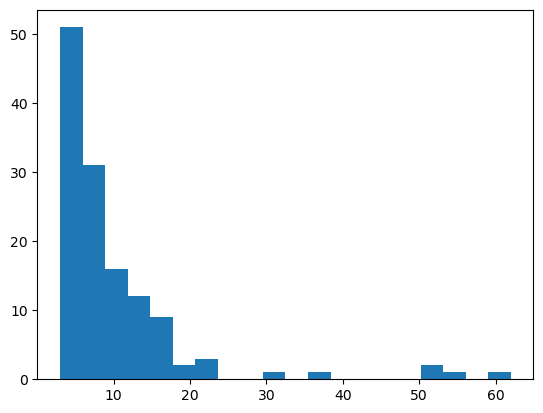

In [292]:
import matplotlib.pyplot as plt

plt.hist(df['experiment_id'].value_counts()[df['experiment_id'].value_counts().values > 2], bins=20)

In [293]:
# # Change the plate to be the paper
levseq_df = df.copy() #[df['experiment_id'].isin(experiments)]
levseq_df['plate'] = levseq_df['paper'].values
# fitness = []
# fitness_type = []
# for ttn, activity in levseq_df[['ttn', 'yield']].values:
#     if ttn == 'trace':
#         ttn = 1.0
#     if activity == 'trace':
#         activity = 0.001 
#     try:
#         ttn = float(ttn)
#     except:
#         try:
#             activity = float(activity)
#         except:
#             fitness.append(None)
#             fitness_type.append(None)
#             print(ttn, activity)
#             continue
#     if ttn != '?':
#         if not isinstance(ttn, float) and not isinstance(ttn, int):
#             print(ttn)
#             fitness.append(0.0)
#             fitness_type.append(None)
#         else:
#             fitness.append(float(ttn))
#             fitness_type.append('TTN')
#     elif activity != '?':
#         if not isinstance(activity, float) and not isinstance(ttn, int):
#             print(ttn)
#             fitness.append(0.0)
#         else:
#             fitness.append(float(activity))
#         fitness_type.append('Activity')
#     else:
#         fitness.append(None)
#         fitness_type.append(None)
#         print(ttn)
# levseq_df['fitness_value'] = fitness
# levseq_df['fitness_type'] = fitness_type
# levseq_df['fitness_value']

In [294]:

for paper_title, grp in levseq_df.groupby('paper'):
    exp_id = paper_to_id.get(paper_title)
    
    chars = ['A', 'B', 'C', 'D', 'E', 'F', 'D', 'G', 'H']
    experiment_df = pd.DataFrame()
    rows = []
    barcode_plate = 1
    columns = ['id', 
                'barcode_plate', 
                'plate',
                'well', 
                'amino_acid_substitutions',
                'alignment_count', 
                'alignment_probability',
                'average_mutation_frequency', 
                'p_value', 
                'p_adj_value', 
                'nt_sequence', 
                'aa_sequence',
                'smiles_string',
                'fitness_value'
                ]
    char_i = 0
    row_idx = 1
    experiment_idx = 0
    for row in grp[columns].values:
        if experiment_idx == 0:
            # Make this one have the parent in it
            row[4] = '#PARENT#'
        row_label = chars[char_i]
        # Here we can make the plate index
        row[1] = barcode_plate
        row[3] = f'{row_label}{row_idx}'
        rows.append(row)
        if row_idx == 12:
            row_idx = 0
            char_i += 1
            if row_label == 'H':
                char_i = 0
                barcode_plate += 1
                # For now just reset
                experiment_idx = 0
        row_idx += 1
        experiment_idx += 1
    experiment_df = pd.DataFrame(rows, columns=columns)
    experiment_df = experiment_df.replace(0, 0.00001)
    experiment_df.to_csv(f'DEDB_V5/experiments/exp_LLM{exp_id}.csv', index=False)

In [295]:
experiment_df

,id,barcode_plate,plate,well,amino_acid_substitutions,alignment_count,alignment_probability,average_mutation_frequency,p_value,p_adj_value,nt_sequence,aa_sequence,smiles_string,fitness_value
0,DEDBL2383,1,i E. coli i surface display of streptavidin fo...,A1,#PARENT#,100,1,1,0.01,0.01,ATGGCTTCTATGACTGGTGGTCAACAAATGGGTCGTGATGAAGCTG...,MASMTGGQQMGRDEAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,Nc1ccc2C(=CC(=O)Oc2c1)C[S](O)(=O)=O,25
1,DEDBL2386,1,i E. coli i surface display of streptavidin fo...,A2,K121M,100,1,1,0.01,0.01,ATGGCTTCTATGACTGGTGGTCAACAAATGGGTCGTGATGAAGCTG...,MASMTGGQQMGRDEAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,Nc1ccc2C(=CC(=O)Oc2c1)C[S](O)(=O)=O,35
2,DEDBL2387,1,i E. coli i surface display of streptavidin fo...,A3,S112Y_K121S,100,1,1,0.01,0.01,ATGGCTTCTATGACTGGTGGTCAACAAATGGGTCGTGATGAAGCTG...,MASMTGGQQMGRDEAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,Nc1ccc2C(=CC(=O)Oc2c1)C[S](O)(=O)=O,140
3,DEDBL2388,1,i E. coli i surface display of streptavidin fo...,A4,S112M_K121A,100,1,1,0.01,0.01,ATGGCTTCTATGACTGGTGGTCAACAAATGGGTCGTGATGAAGCTG...,MASMTGGQQMGRDEAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,Nc1ccc2C(=CC(=O)Oc2c1)C[S](O)(=O)=O,150
4,DEDBL2389,1,i E. coli i surface display of streptavidin fo...,A5,S112Q_K121M,100,1,1,0.01,0.01,ATGGCTTCTATGACTGGTGGTCAACAAATGGGTCGTGATGAAGCTG...,MASMTGGQQMGRDEAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,Nc1ccc2C(=CC(=O)Oc2c1)C[S](O)(=O)=O,100
5,DEDBL2384,1,i E. coli i surface display of streptavidin fo...,A6,K121S,100,1,1,0.01,0.01,ATGGCTTCTATGACTGGTGGTCAACAAATGGGTCGTGATGAAGCTG...,MASMTGGQQMGRDEAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,Nc1ccc2C(=CC(=O)Oc2c1)C[S](O)(=O)=O,50
6,DEDBL2385,1,i E. coli i surface display of streptavidin fo...,A7,K121A,100,1,1,0.01,0.01,ATGGCTTCTATGACTGGTGGTCAACAAATGGGTCGTGATGAAGCTG...,MASMTGGQQMGRDEAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,Nc1ccc2C(=CC(=O)Oc2c1)C[S](O)(=O)=O,60


# Now also make a metadata df to go with each one

Metadata columns:
- cif file  
- experiment_id
- experiment_name
- experiment_date
- substrate_smiles
- product_smiles
- assay_technique

```
Index(['Unnamed: 0', 'culture_collection_entry', 'enzyme_name_from_paper',
       'Uniprot_ID(if applicable)', 'comment', 'reaction_smiles',
       'parent_DNA_sequence', 'parent_aminoacid_sequence',
       'aminoacid_mutations_from_parent', 'variant_DNA_sequence',
       'mutations_from_parent', 'cofactor', 'additive (if applicable)',
       'additive_CAS', 'enzyme_form', 'substrate_concentration',
       'activity_for_reaction_% (if applicable)', 'TTN (if applicable)',
       'selectivity(ee%),diastereo or chemo should be a separate smiles entry',
       'alternative_product_SMILES', 'failed_substrates (if available)',
       'date published ', 'first author', 'paper title', 'doi', 'SUBMITTED BY',
       'raw data name', 'cannonical_reactions', 'named_reactions', 'errors',
       'parent_aa', 'variant_aa', 'warnings', 'id'],
      dtype='object')

```

In [296]:
metadata_rows = []
for name, experiment in levseq_df.groupby('paper'):
    experiment_id = f'exp_LLM{paper_to_id.get(name)}'
    #if name != 'An Enzymatic Platform for Primary Amination of 1-Aryl-2-alkyl Alkynes':
    # this is what makes each a row in the df (each should have the same reaction/products and substrates)
    all_products = []
    all_substrates = []
    main_reaction = experiment['smiles_reaction'].values[0]
    
    products = '.'.join(list(set(main_reaction.split('>>')[1].split('.'))))
    substrates = '.'.join(list(set(main_reaction.split('>>')[0].split('.'))))
    paper = experiment['paper'].values[0]
    date = '11/08/2025'
    try:
        cif = experiment[~experiment['cif'].isna()]['cif'].values[0]
    except:
        print(name, experiment)
        continue
    seq = experiment['aa_sequence'].values[0]
    seq = seq.replace('*', '')
    metadata_rows.append([experiment_id, paper, date, substrates, products, 'LLM', seq, cif])

metadata_df = pd.DataFrame(metadata_rows, columns=['experiment_id', 'experiment_name', 'experiment_date', 'substrate_smiles', 'product_smiles', 'assay_technique', 'parent_amino_acid', 'cif_filename'])
metadata_df

Stereoselective amino acid synthesis by photobiocatalytic oxidative coupling_final.csv              id  barcode_plate  \
2216  DEDBL2216              1   

                                                  plate  well  \
2216  Stereoselective amino acid synthesis by photob...     1   

                           smiles_string  \
2216  N[C@H](C(=O)O)[C@@H](C)C1=CC=CC=C1   

                                        smiles_reaction  alignment_count  \
2216  C1(=CC=CC=C1)C(C)[B-](F)(F)F.NCC(=O)O>>N[C@H](...              100   

      alignment_probability nucleotide_mutation amino_acid_substitutions  ...  \
2216                      1                 NaN                 #PARENT#  ...   

                                             variant_aa index  \
2216  MGSSHHHHHHSSGLVPRGSHMIDLRSDTVTKPTEEMRKAMAQAEVG...  2216   

                                      protein_to_smiles  chai cif_path   cif  \
2216  MGSSHHHHHHSSGLVPRGSHMIDLRSDTVTKPTEEMRKAMAQAEVG...  None     None  None   

     experiment_

,experiment_id,experiment_name,experiment_date,substrate_smiles,product_smiles,assay_technique,parent_amino_acid,cif_filename
0,exp_LLM10,A Diverse Library of Chiral Cyclopropane Scaff...,11/08/2025,[N+](=[N-])=CC(CC1=CC=CC=C1)=O.BrC1=CC=C(C=C1)C=C,C(C1=CC=CC=C1)(=O)[C@@H]1[C@H](C1)C1=CC=C(C=C1)Br,LLM,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,chai52_0.cif
1,exp_LLM59,A Photoenzymatic Strategy for Radical-Mediated...,11/08/2025,,C1=C(C=CC2=CC=CC=C12)[C@H](CCC(=O)OCC1=CC=CC=C1)C,LLM,MSFVKDFKPQALGDTNLFKPIKIGNNELLHRAVIPPLTRMRALHPG...,chai42_0.cif
2,exp_LLM37,A cell-penetrating artificial metalloenzyme re...,11/08/2025,,N[C@@H](CC1=CC(I)=C(C(I)=C1)OC1=CC(I)=C(C=C1)O...,LLM,MASMTGGQQMGRDQAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,chai3_0.cif
3,exp_LLM104,A designer enzyme for hydrazone and oxime form...,11/08/2025,N(N)C1=CC=C(C2=NON=C21)[N+](=O)[O-].[N+](=O)([...,[N+](=O)([O-])C1=CC=C(C=2C1=NON2)NN=CC2=CC=C(C...,LLM,GAEIPKEMLRAQTNKILLNVLKQGDNYVYGIIKQVKEASNGEMELN...,chai9_0.cif
4,exp_LLM15,Accessing non-natural reactivity by irradiatin...,11/08/2025,,BrC1(COC(=O)C1)c2ccc3ccccc3c2,LLM,MTDRLKGKVAIVTGGTLGIGLAIADKFVEEGAKVVITGRHADVGEK...,chai66_0.cif
...,...,...,...,...,...,...,...,...
99,exp_LLM2,dna-Production of Biobased Ethylbenzene by Cas...,11/08/2025,OC(=O)CCc1ccccc1,CCc1ccccc1,LLM,MASAVEDIRKVLSDSSSPVAGQKYDYILVGGGTAACVLANRLSADG...,chai40_0.cif
100,exp_LLM7,dna-Saturation Mutagenesis for Phenylalanine A...,11/08/2025,COC1=CC=C(C[C@@H](N)C(=O)O)C=C1,COc1ccc(\C=C\C(O)=O)cc1,LLM,MENGNGATTNGHVNGNGMDFCMKTEDPLYWGIAAEAMTGSHLDEVK...,chai29_0.cif
101,exp_LLM60,dna-Stereospecific radical coupling with a non...,11/08/2025,,COC1=CC=C(C=C1)CC(CC=O)C1=CC=CC=C1,LLM,MTDLKASSLRALKLMDLATLNGDYTDEKVIALCHQAKTPVGNTAAI...,chai47_0.cif
102,exp_LLM26,dna-Unlocking the function promiscuity of old ...,11/08/2025,,OC(C=1C(CCC1)=O)C1=CC(=CC=C1)[N+](=O)[O-],LLM,MNTMLFSPYTIRGLTLKNRIVMSPMCMYSCDTKDGAVRTWHKIHYP...,chai50_0.cif


In [297]:
metadata_df.to_csv('DEDB_V5/LevSeq-metadata_formatted_protein-evolution-database_V5_LLM.csv', index=False)

In [298]:
chosen_structures = set(metadata_df['cif_filename'].values) #.value_counts()

In [299]:
# just want to make sure the parent is in there
for cif in set(df['cif_path'].values):
    #if cif.split('/')[-1] in chosen_structures:
    if cif and os.path.exists(cif):
        try:
            os.system(f'cp {cif} DEDB_V5/structures_LLM/')
        except:
            print(cif)

In [300]:
metadata_df

,experiment_id,experiment_name,experiment_date,substrate_smiles,product_smiles,assay_technique,parent_amino_acid,cif_filename
0,exp_LLM10,A Diverse Library of Chiral Cyclopropane Scaff...,11/08/2025,[N+](=[N-])=CC(CC1=CC=CC=C1)=O.BrC1=CC=C(C=C1)C=C,C(C1=CC=CC=C1)(=O)[C@@H]1[C@H](C1)C1=CC=C(C=C1)Br,LLM,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,chai52_0.cif
1,exp_LLM59,A Photoenzymatic Strategy for Radical-Mediated...,11/08/2025,,C1=C(C=CC2=CC=CC=C12)[C@H](CCC(=O)OCC1=CC=CC=C1)C,LLM,MSFVKDFKPQALGDTNLFKPIKIGNNELLHRAVIPPLTRMRALHPG...,chai42_0.cif
2,exp_LLM37,A cell-penetrating artificial metalloenzyme re...,11/08/2025,,N[C@@H](CC1=CC(I)=C(C(I)=C1)OC1=CC(I)=C(C=C1)O...,LLM,MASMTGGQQMGRDQAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,chai3_0.cif
3,exp_LLM104,A designer enzyme for hydrazone and oxime form...,11/08/2025,N(N)C1=CC=C(C2=NON=C21)[N+](=O)[O-].[N+](=O)([...,[N+](=O)([O-])C1=CC=C(C=2C1=NON2)NN=CC2=CC=C(C...,LLM,GAEIPKEMLRAQTNKILLNVLKQGDNYVYGIIKQVKEASNGEMELN...,chai9_0.cif
4,exp_LLM15,Accessing non-natural reactivity by irradiatin...,11/08/2025,,BrC1(COC(=O)C1)c2ccc3ccccc3c2,LLM,MTDRLKGKVAIVTGGTLGIGLAIADKFVEEGAKVVITGRHADVGEK...,chai66_0.cif
...,...,...,...,...,...,...,...,...
99,exp_LLM2,dna-Production of Biobased Ethylbenzene by Cas...,11/08/2025,OC(=O)CCc1ccccc1,CCc1ccccc1,LLM,MASAVEDIRKVLSDSSSPVAGQKYDYILVGGGTAACVLANRLSADG...,chai40_0.cif
100,exp_LLM7,dna-Saturation Mutagenesis for Phenylalanine A...,11/08/2025,COC1=CC=C(C[C@@H](N)C(=O)O)C=C1,COc1ccc(\C=C\C(O)=O)cc1,LLM,MENGNGATTNGHVNGNGMDFCMKTEDPLYWGIAAEAMTGSHLDEVK...,chai29_0.cif
101,exp_LLM60,dna-Stereospecific radical coupling with a non...,11/08/2025,,COC1=CC=C(C=C1)CC(CC=O)C1=CC=CC=C1,LLM,MTDLKASSLRALKLMDLATLNGDYTDEKVIALCHQAKTPVGNTAAI...,chai47_0.cif
102,exp_LLM26,dna-Unlocking the function promiscuity of old ...,11/08/2025,,OC(C=1C(CCC1)=O)C1=CC(=CC=C1)[N+](=O)[O-],LLM,MNTMLFSPYTIRGLTLKNRIVMSPMCMYSCDTKDGAVRTWHKIHYP...,chai50_0.cif


In [301]:
df

,id,barcode_plate,plate,well,smiles_string,smiles_reaction,alignment_count,alignment_probability,nucleotide_mutation,amino_acid_substitutions,...,variant_aa,index,protein_to_smiles,chai,cif_path,cif,experiment_id,average_mutation_frequency,p_value,p_adj_value
1656,DEDBL1656,1,1,1,C(C1=CC=CC=C1)(=O)[C@@H]1[C@H](C1)C1=CC=C(C=C1)Br,BrC1=CC=C(C=C1)C=C.[N+](=[N-])=CC(CC1=CC=CC=C1...,100,1,T203C,V68A,...,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,1656,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,None,None,None,E-1,1,0.01,0.01
1649,DEDBL1649,1,1,1,C1(=CC=CC=C1)CC(=O)[C@@H]1[C@H](C1)C1=CC=CC=C1,C(=C)C1=CC=CC=C1.[N+](=[N-])=CC(CC1=CC=CC=C1)=...,100,1,T203C,V68A,...,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,1649,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,None,None,None,E-2,1,0.01,0.01
1650,DEDBL1650,1,1,1,C1(=CC=CC=C1)CC(=O)[C@@H]1[C@H](C1)C1=CC=CC=C1,C(=C)C1=CC=CC=C1.[N+](=[N-])=CC(CC1=CC=CC=C1)=...,100,1,A319T_T320C,I107S,...,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,1650,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,None,None,None,E-2,1,0.01,0.01
1658,DEDBL1658,1,1,1,C(C1=CC=CC=C1)(=O)[C@@H]1[C@H](C1)C1=CC(=CC=C1)C,CC1=CC(=CC=C1)C=C.[N+](=[N-])=CC(CC1=CC=CC=C1)...,100,1,T203C,V68A,...,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,1658,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,None,None,None,E-3,1,0.01,0.01
1651,DEDBL1651,1,1,1,C1(=CC=CC=C1)CC(=O)[C@@H]1[C@H](C1)C1=CC=CC=C1,C(=C)C1=CC=CC=C1.[N+](=[N-])=CC(CC1=CC=CC=C1)=...,100,1,T203C,V68A,...,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,1651,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,None,None,None,E-2,1,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,DEDBL2387,1,1,1,Nc1ccc2C(=CC(=O)Oc2c1)C[S](O)(=O)=O,>>Nc1ccc2C(=CC(=O)Oc2c1)C[S](O)(=O)=O,100,1,C335A_A361T_A362C_A363T,S112Y_K121S,...,MASMTGGQQMGRDEAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,2387,MASMTGGQQMGRDEAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,None,None,None,E-1144,1,0.01,0.01
2388,DEDBL2388,1,1,1,Nc1ccc2C(=CC(=O)Oc2c1)C[S](O)(=O)=O,>>Nc1ccc2C(=CC(=O)Oc2c1)C[S](O)(=O)=O,100,1,T334A_C335T_T336G_A361G_A362C_A363T,S112M_K121A,...,MASMTGGQQMGRDEAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,2388,MASMTGGQQMGRDEAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,None,None,None,E-1144,1,0.01,0.01
2389,DEDBL2389,1,1,1,Nc1ccc2C(=CC(=O)Oc2c1)C[S](O)(=O)=O,>>Nc1ccc2C(=CC(=O)Oc2c1)C[S](O)(=O)=O,100,1,T334C_C335A_T336A_A362T_A363G,S112Q_K121M,...,MASMTGGQQMGRDEAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,2389,MASMTGGQQMGRDEAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,None,None,None,E-1144,1,0.01,0.01
2384,DEDBL2384,1,1,1,Nc1ccc2C(=CC(=O)Oc2c1)C[S](O)(=O)=O,>>Nc1ccc2C(=CC(=O)Oc2c1)C[S](O)(=O)=O,100,1,A361T_A362C_A363T,K121S,...,MASMTGGQQMGRDEAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,2384,MASMTGGQQMGRDEAGITGTWYNQLGSTFIVTAGADGALTGTYESA...,None,None,None,E-1144,1,0.01,0.01
